# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 10: *CamShift*
Tracks a region by implementing the CamShift technique. Similar to the MEanShift, but
it uses backprojection to update the region positions and size
***  

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadRGB, plotImageRGB, createImageF
from ImageRegionsUtilities import densityHistogram, colourFeature, meanShift, backProjection,backProjectionImage,regionSize
                         
# Math and iteration
from math import exp
from timeit import itertools

### Setup modules

### Parameters:
    pathToDir = Input image directory
    imageNames = Input image names
    initialPos = position of the region [column, row]
    size = Size of the region [column, row]
    sigma = weight control

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter10/Input/")
imageNames = ["frame1.bmp", "frame2.bmp", "frame3.bmp", "frame4.bmp", "frame5.bmp", "frame6.bmp"]

histoSize = 64
initialPos = [100, 60]
sizeReg = [12, 18]
sigma  = 6.0

### Read first image

In [3]:
inputImage, width, height = imageReadRGB(pathToDir + imageNames[0])

### Density and back projection of the region to track

In [4]:
positions = [ ]
positions.append(initialPos)
sizes = [ ]
sizes.append(sizeReg)

q = densityHistogram(inputImage, positions[0], sizeReg, sigma, histoSize)
backProjImage = backProjectionImage(inputImage, q, histoSize)
#plot3DHistogram(q)

# For each frame
numImages = len(imageNames)
for frameNum in range(1, numImages):
    
    # Read next frame and estimate the position by using meanshift
    currentImage, _, _ = imageReadRGB(pathToDir + imageNames[frameNum])
    newPos = meanShift(currentImage, q, sizeReg, sigma, histoSize, positions[frameNum-1])

    # Back project and use the projections to determine the new position and size
    newBackProjImage = backProjectionImage(currentImage, q, histoSize)
    pos,newSize = regionSize(backProjImage, newBackProjImage,                            \
                             positions[frameNum-1], newPos, sizeReg)
    positions.append(pos)
    sizes.append(newSize)
    
    # Update density and image
    inputImage = currentImage
    sizeReg = newSize
    backProjImage = newBackProjImage
#print(positions)
#print(sizes)

### Show results

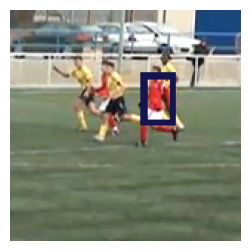

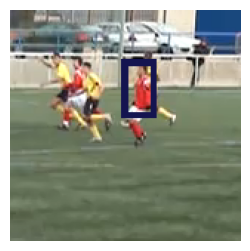

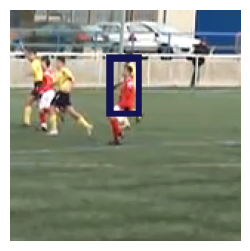

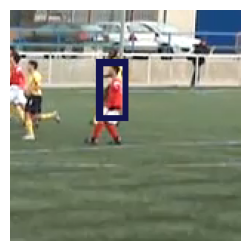

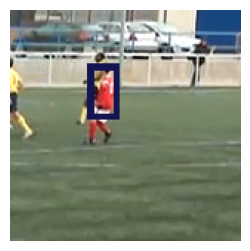

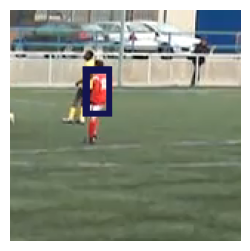

In [5]:
for frameNum in range(0, numImages):
    
    image, _, _ = imageReadRGB(pathToDir + imageNames[frameNum])
    p = positions[frameNum]
    s = sizes[frameNum]
    borderDistance = [s[0] -5, s[1] -5]
    for x, y in itertools.product(range(p[0]-s[0], p[0]+s[0]), \
                                  range(p[1]-s[1], p[1]+s[1])):
        
        if abs(x-p[0]) > borderDistance[0] or abs(y-p[1]) > borderDistance[1]:
            image[y,x] = [20, 20, 80]
    
    plotImageRGB(image, figureSize = 3)
    